# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, \
contamination_benzene_memoris, contamination_toluene_memoris
from utils.utils import boreholes_from_files
from utils.io import gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
pol = ['Benzene', 'Toluene', 'As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol_lev = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df.drop(columns=['Pollutant', 'Concentration'], inplace=True)
df[[pol[0], pol[1]]] = ''
df[pol[0]] = df[pol[0]].apply(lambda x: random.sample(pol_lev, 1)[0])
df[pol[1]] = df[pol[1]].apply(lambda x: random.sample(pol_lev, 1)[0])
#df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df

,ID,X,Y,Z,Diameter,Length,Lithology,Colour,Thickness,Top_litho,Base_litho,Unit,Benzene,Toluene
0,BH001,152600.0,121039.0,101.0,0.43,39,Sable,Jaune,4,0,4,mg/l,VS,VS
1,BH001,152600.0,121039.0,97.0,0.43,39,Argile,Vert,4,4,8,mg/l,VR,VR
2,BH001,152600.0,121039.0,93.0,0.43,39,Marne,Gris,12,8,20,mg/l,VI,VS
3,BH001,152600.0,121039.0,81.0,0.43,39,Charbon,Noir,8,20,28,mg/l,VS,VS
4,BH001,152600.0,121039.0,73.0,0.43,39,Dolomie,Bleu,11,28,39,mg/l,VS,VS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,BH199,152455.0,121128.0,102.0,0.57,36,Sable,Jaune,5,0,5,mg/l,VR,VS
991,BH199,152455.0,121128.0,97.0,0.57,36,Argile,Vert,3,5,8,mg/l,VR,VS
992,BH199,152455.0,121128.0,94.0,0.57,36,Marne,Gris,11,8,19,mg/l,VS,VS
993,BH199,152455.0,121128.0,83.0,0.57,36,Charbon,Noir,8,19,27,mg/l,VS,VR


In [6]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'VS', 'VR', 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'VI', 'VR', 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [7]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [8]:
bhs_df=[df[0:50]] # list of dataframes

In [9]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Benzene', 'Toluene'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
{'lithology': 'dolomie'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
{'lithology': 'dolomie'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
{'lithology': 'dolomie'}
Summary : [Striplog(5 Intervals, start=0.0, stop=26.0)]
|__ID:'BH005'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
{'lithology': 'dolomie'}
{'lithology': 'schiste'}
Summary : [Striplog(6 Intervals, start=0.0, stop=32.0)]
|__ID:'BH006'
{'litholo

/home/yanathan/Projects/GSDMA/utils/utils.py:899: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="components"' to the 'ComponentOrm.intervals' relationship.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/utils.py:899: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relatio

In [10]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [11]:
components

{0: Component({'lithology': 'marne'}),
 1: Component({'lithology': 'charbon'}),
 2: Component({'lithology': 'argile'}),
 3: Component({'lithology': 'sable'}),
 4: Component({'lithology': 'dolomie'}),
 5: Component({'lithology': 'schiste'}),
 6: Component({'lithology': 'calcaire'})}

In [12]:
len(boreholes), len(components)

(10, 7)

## Create a project and save data in a database

In [13]:
remove('tmp_files/tfe_orm_db.db')

In [14]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [15]:
Base.metadata.create_all(engine)

2021-07-16 00:53:56,409 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-16 00:53:56,410 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-16 00:53:56,410 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-16 00:53:56,412 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-16 00:53:56,413 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-16 00:53:56,413 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-16 00:53:56,414 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-16 00:53:56,415 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-16 00:53:56,416 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-16 00:53:56,416 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("IntervalData")
2021-07-16 00:53:56,417 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-16 00:53:56,418 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("IntervalData")
2021-07-16 00:53:56,418 INFO sqlalchemy.engine.E

In [16]:
Session = sessionmaker(bind=engine)
session = Session()

## Define project legend(s) and default attribute for representation

In [17]:
p = Project(session, lexicon=lexicon_memoris, repr_attribute='lithology',
            legend_dict={'lithology':{'legend':lithology_memoris}, 
                         'benzene':{'legend':contamination_benzene_memoris}},)

2021-07-16 00:53:56,466 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-16 00:53:56,469 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-16 00:53:56,470 INFO sqlalchemy.engine.Engine [generated in 0.00074s] ()


In [18]:
p.add_components(components)

2021-07-16 00:53:56,474 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-16 00:53:56,475 INFO sqlalchemy.engine.Engine [generated in 0.00090s] ((0, 'Marne'), (1, 'Charbon'), (2, 'Argile'), (3, 'Sable'), (4, 'Dolomie'), (5, 'Schiste'), (6, 'Calcaire'))
2021-07-16 00:53:56,476 INFO sqlalchemy.engine.Engine COMMIT
2021-07-16 00:53:56,482 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-16 00:53:56,483 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-16 00:53:56,483 INFO sqlalchemy.engine.Engine [cached since 0.01386s ago] ()


Add boreholes into the project

In [19]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-16 00:53:56,491 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-16 00:53:56,492 INFO sqlalchemy.engine.Engine [generated in 0.00159s] ('BH001', 28.0, 0.43)
2021-07-16 00:53:56,495 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-16 00:53:56,496 INFO sqlalchemy.engine.Engine [generated in 0.00095s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-16 00:53:56,499 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-16 00:53:56,500 INFO sqlalchemy.e

2021-07-16 00:53:56,571 INFO sqlalchemy.engine.Engine [cached since 0.04964s ago] (8,)
2021-07-16 00:53:56,573 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,574 INFO sqlalchemy.engine.Engine [cached since 0.04887s ago] (9,)
2021-07-16 00:53:56,576 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,576 INFO sqlalchemy.engine.Engine [cached since 0.05451s ago] (10,)
2021-07-16 00:53:56,577 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-07-16 00:53:56,631 INFO sqlalchemy.engine.Engine [cached since 0.1094s ago] (22,)
2021-07-16 00:53:56,632 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,633 INFO sqlalchemy.engine.Engine [cached since 0.1081s ago] (23,)
2021-07-16 00:53:56,635 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,637 INFO sqlalchemy.engine.Engine [cached since 0.1149s ago] (24,)
2021-07-16 00:53:56,638 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-16 00:53:56,694 INFO sqlalchemy.engine.Engine [cached since 0.1719s ago] (36,)
2021-07-16 00:53:56,696 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,697 INFO sqlalchemy.engine.Engine [cached since 0.1717s ago] (37,)
Borehole geometry created successfully !
2021-07-16 00:53:56,707 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-16 00:53:56,708 INFO sqlalchemy.engine.Engine [cached since 0.1558s ago] (96.0, 'BH004')
2021-07-16 00:53:56,709 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-16 00:53:56,710 INFO sqlalchemy.engine.Engine [cached since 0.2195s ago] ('BH005', 32.0, 0.61)
2021-07-16 00:53:56,712 INFO sql

2021-07-16 00:53:56,766 INFO sqlalchemy.engine.Engine [cached since 0.2147s ago] (97.0, 'BH005')
2021-07-16 00:53:56,768 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-16 00:53:56,768 INFO sqlalchemy.engine.Engine [cached since 0.278s ago] ('BH006', 26.0, 0.31)
2021-07-16 00:53:56,770 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-16 00:53:56,770 INFO sqlalchemy.engine.Engine [cached since 0.2753s ago] ((50, 101.0, 101.0, 101.0, 152375.0, 121002.0), (51, 100.0, 100.0, 100.0, 152375.0, 121002.0), (52, 100.0, 100.0, 100.0, 152375.0, 121002.0), (53, 98.0, 98.0, 98.0, 152375.0, 121002.0), (54, 98.0, 98.0, 98.0, 152375.0, 121002.0), (55, 92.0, 92.0, 92.0, 152375.0, 121002.0), (56, 92.0, 92.0, 92.0, 152375.0, 121002.0), (57, 86.0, 86.0, 86.0, 152375.0, 121002.0), (58, 86.0, 86.0, 86.0, 152375.0, 121002.0), (59, 75.0, 75.0, 75.0, 152375.0, 121002.0))
2021-07-16 00:5

2021-07-16 00:53:56,831 INFO sqlalchemy.engine.Engine COMMIT
2021-07-16 00:53:56,834 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-16 00:53:56,835 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-16 00:53:56,836 INFO sqlalchemy.engine.Engine [cached since 0.3663s ago] ()
2021-07-16 00:53:56,838 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-16 00:53:56,838 INFO sqlalchemy.engine.Engine [cached since 0.3247s ago] ('BH007',)
2021-07-16 00:53:56,840 INFO sqlalchemy.engine.Engine SELECT

2021-07-16 00:53:56,889 INFO sqlalchemy.engine.Engine [cached since 0.3757s ago] ('BH008',)
2021-07-16 00:53:56,891 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,892 INFO sqlalchemy.engine.Engine [cached since 0.3703s ago] (72,)
2021-07-16 00:53:56,893 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,894 INFO sqlalchemy.engine.Engine [cached since 0.3691s ago] (73,)
2021-07-16 00:53:56,896 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positi

2021-07-16 00:53:56,948 INFO sqlalchemy.engine.Engine [cached since 0.4235s ago] (85,)
2021-07-16 00:53:56,950 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,950 INFO sqlalchemy.engine.Engine [cached since 0.4286s ago] (86,)
2021-07-16 00:53:56,951 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-16 00:53:56,952 INFO sqlalchemy.engine.Engine [cached since 0.4271s ago] (87,)
2021-07-16 00:53:56,953 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

Borehole geometry created successfully !


In [20]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-16 00:53:57,016 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-16 00:53:57,017 INFO sqlalchemy.engine.Engine [cached since 0.4653s ago] (95.0, 'BH10')
2021-07-16 00:53:57,019 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-16 00:53:57,020 INFO sqlalchemy.engine.Engine [generated in 0.00066s] ((0, 3, ''), (1, 2, ''), (2, 0, ''), (3, 1, ''), (4, 3, ''), (5, 2, ''), (6, 0, ''), (7, 1, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 0, ''), (49, 1, ''))
2021-07-16 00:53:57,022 INFO sqlalchemy.engine.Engine COMMIT
2021-07-16 00:53:57,024 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-16 00:53:57,025 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-16 00:53:57,026 INFO sqlalchemy.engine.Engine [cached since

In [21]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-16 00:53:57,030 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [22]:
p.boreholes

2021-07-16 00:53:57,038 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-16 00:53:57,039 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-16 00:53:57,040 INFO sqlalchemy.engine.Engine [generated in 0.00067s] ('BH001',)
2021-07-16 00:53:57,041 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-16 00:53:57,042 INFO sqlalchemy.engine.Engine [cached since 0.5282s ago] ('BH001',)
2021-07-16 00:53:57,043 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_

2021-07-16 00:53:57,087 INFO sqlalchemy.engine.Engine [cached since 0.5729s ago] ('BH10',)


[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [23]:
p.refresh(verbose=False)

2021-07-16 00:53:57,094 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-16 00:53:57,095 INFO sqlalchemy.engine.Engine [cached since 0.626s ago] ()


In [24]:
session.close()

2021-07-16 00:53:57,099 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

In [25]:
attributes = list(p.legend_dict.keys())
attributes

['lithology', 'benzene']

In [26]:
p.update_legend_cmap(update_all_attrib=True) #[0][attributes[0]]['cmap']

({'lithology': {'legend': Legend(Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
   Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})})
   Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})
   Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})})
   Decor({'_colour': '#fdaffe', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})
   Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
   Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})})),
   'cmap': <matplotlib.colors.ListedColormap at 0x7f2055294d30>,
   'values': ['sable',
    'argile',
    'marne',
    'charbon',
    'dolomie',
    'schiste',
    'calcaire']},
  'benzene': {'l

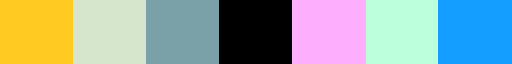

In [27]:
p.legend_dict[attributes[0]]['cmap']

## Display one object (attribute = 'lithology')

In [28]:
bh = 1
p.boreholes_3d[bh].components

{0: [Component({'lithology': 'sable'}), Component({'benzene': 'Inconnu'})],
 1: [Component({'lithology': 'argile'}), Component({'benzene': 'Inconnu'})],
 2: [Component({'lithology': 'marne'}), Component({'benzene': 'Inconnu'})],
 3: [Component({'lithology': 'charbon'}), Component({'benzene': 'Inconnu'})],
 4: [Component({'lithology': 'dolomie'}), Component({'benzene': 'Inconnu'})]}

/home/yanathan/Projects/GSDMA/utils/utils.py:274: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin, w, thick, fc=fc, lw=lw, hatch=d.hatch,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


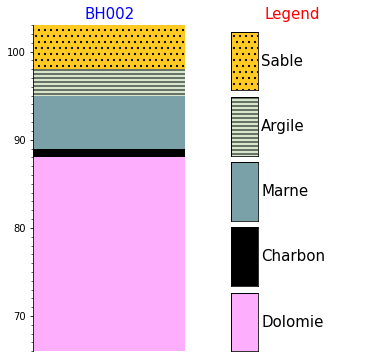

In [29]:
p.boreholes_3d[bh].log_plot()

In [30]:
sargs = dict(title='test', title_font_size=30, label_font_size=12, n_labels=0,
             fmt="%.2f", font_family="arial", color='k',interactive=True, 
             vertical=True, italic=True, shadow=False,)

In [31]:
bh=1
p.boreholes_3d[bh].plot3d(custom_legend=False, scalar_bar_args=sargs)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [32]:
p.plot2d()

In [33]:
p.boreholes_3d[0].intervals['top']

TypeError: list indices must be integers or slices, not str

## Plot with another attribute

In [ ]:
p.legend_dict

In [ ]:
p.boreholes_3d[bh].log_plot(repr_attribute=attributes[1])

In [ ]:
p.boreholes_3d[bh].plot3d(repr_attribute=attributes[1])

### Display project boreholes

In [ ]:
p.plot3d(repr_attribute=attributes[0], labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

### Boreholes in 3D using X3D for interaction within the notebook